In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo 
from sklearn.preprocessing import LabelEncoder

sns.set_style("white")

In [2]:
mushroom = fetch_ucirepo(id=73) 
  
X = mushroom.data.features 
y = mushroom.data.targets 

df = pd.DataFrame(X)
df["target"] = y

In [3]:
print(f"Poisonous: {sum(y["poisonous"]=='p')}, Edible:  {sum(y["poisonous"]=='e')}")


Poisonous: 3916, Edible:  4208


In [4]:
X.columns

Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [5]:
print(X.isnull().sum())

cap-shape                      0
cap-surface                    0
cap-color                      0
bruises                        0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
dtype: int64


In [6]:
X.describe().T

,count,unique,top,freq
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728
stalk-shape,8124,2,t,4608


In [7]:
set(X["veil-type"])

{'p'}

<Axes: xlabel='target', ylabel='Count'>

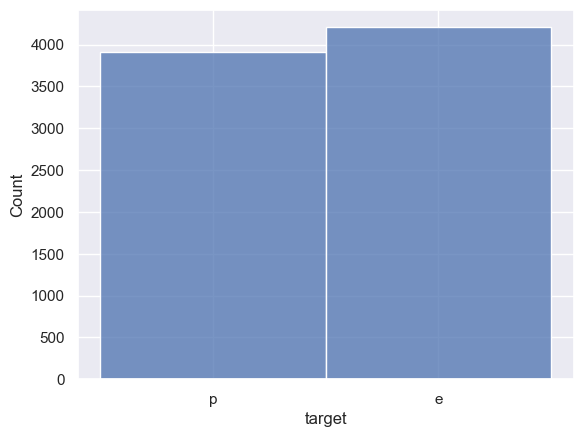

In [8]:
sns.set_theme()

sns.histplot(df["target"])

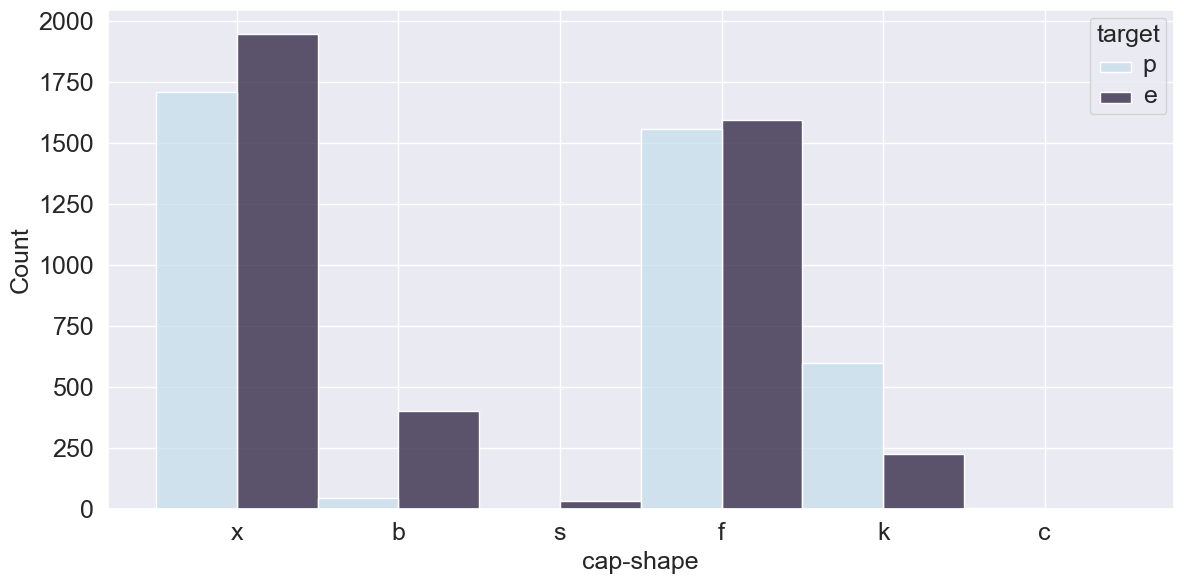

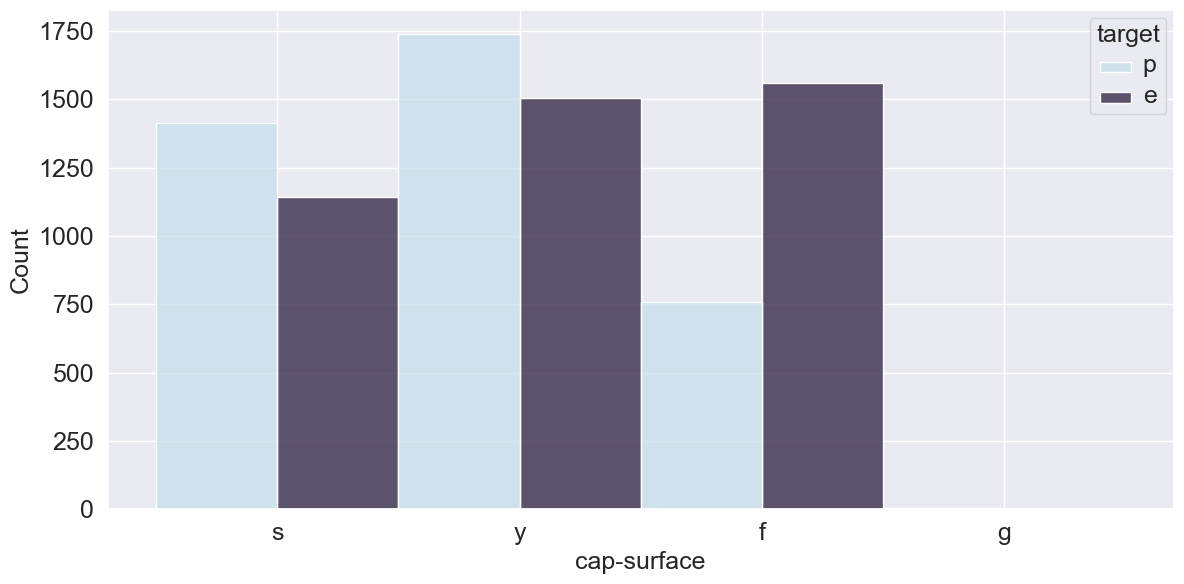

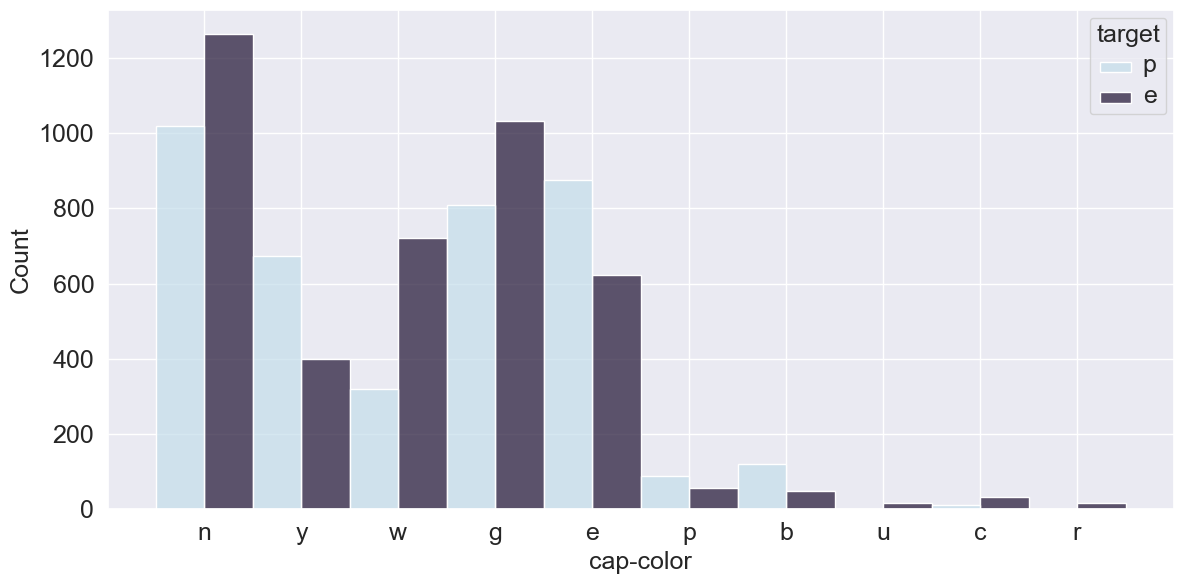

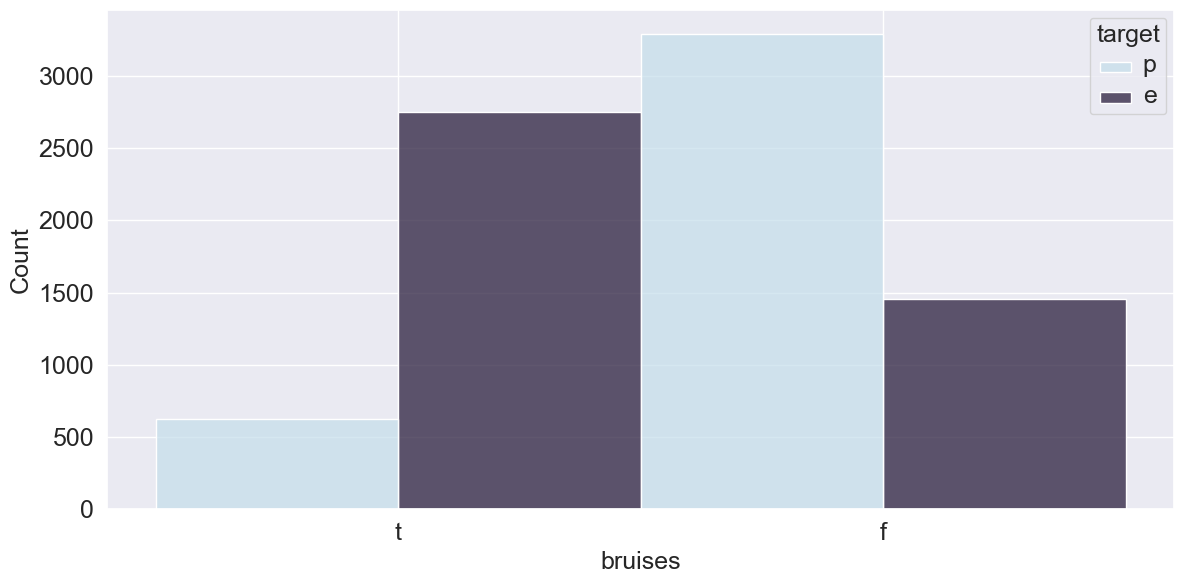

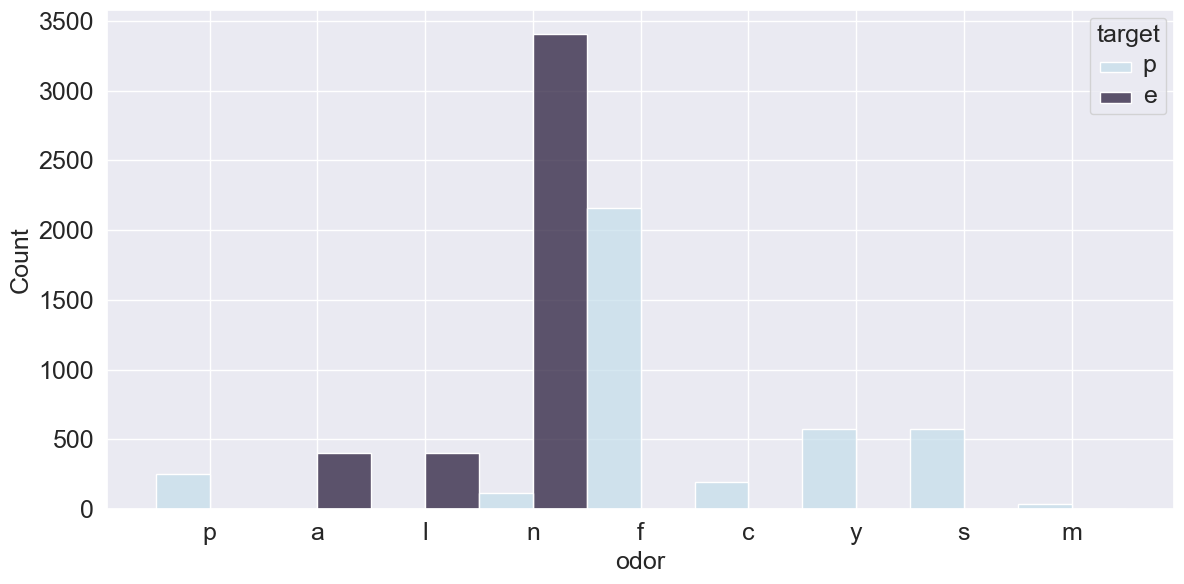

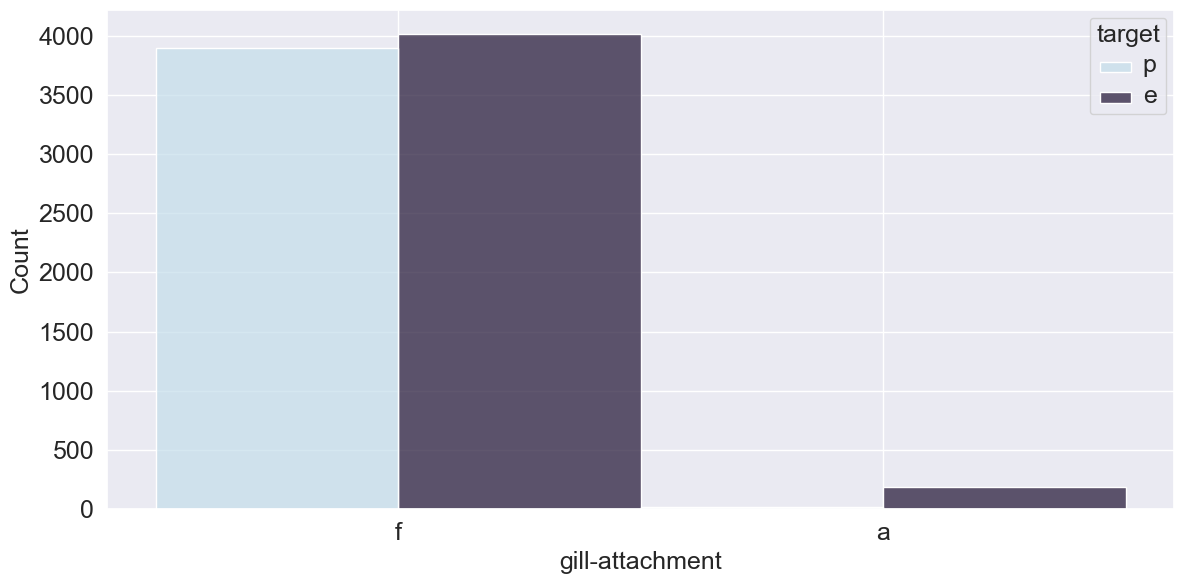

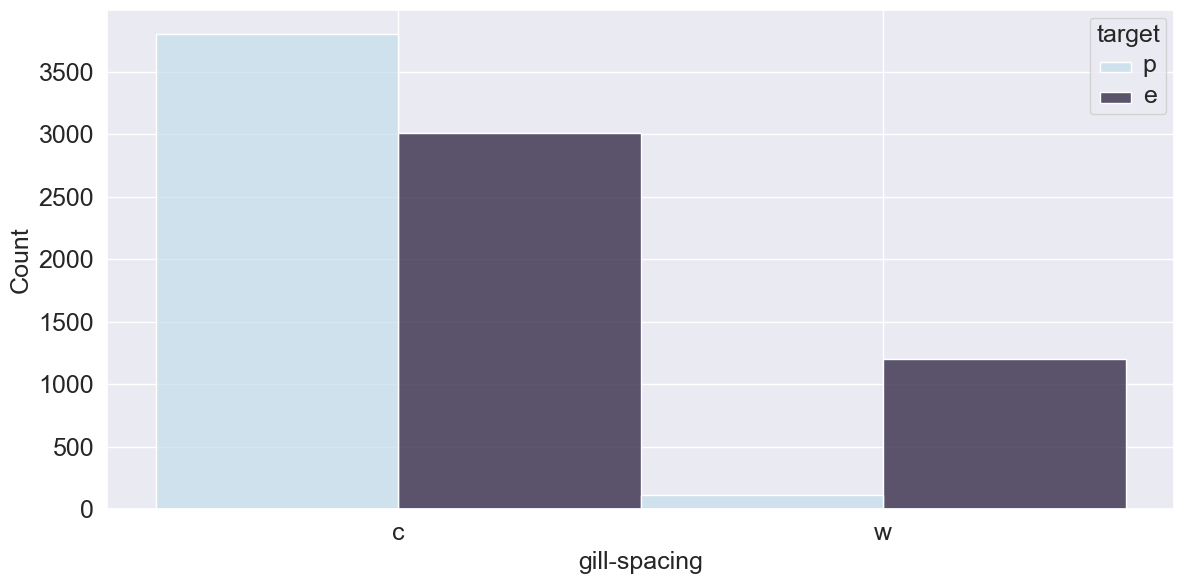

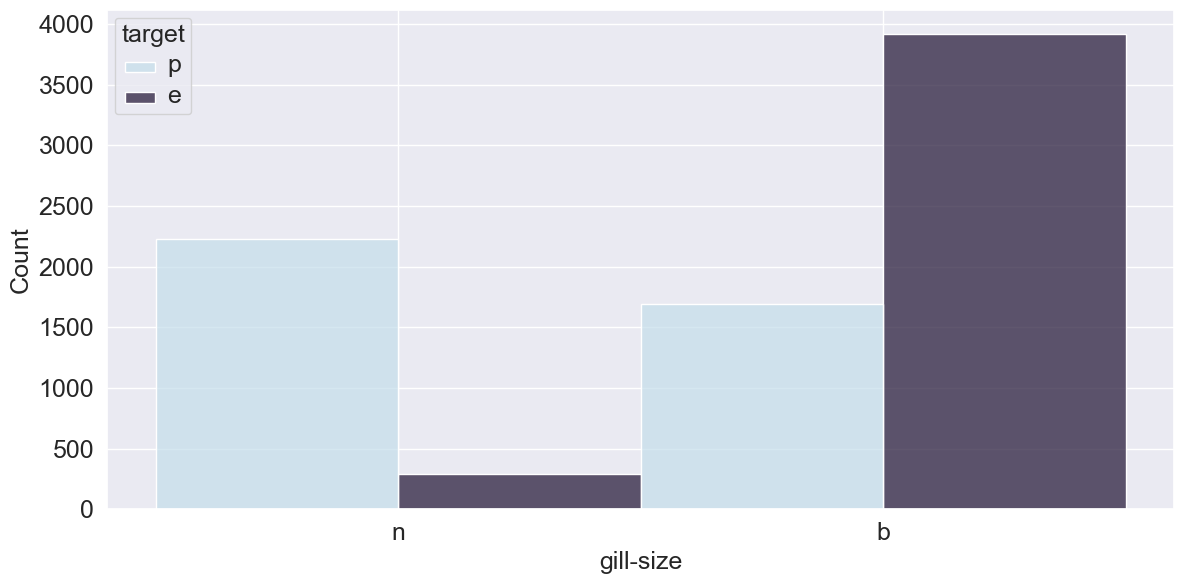

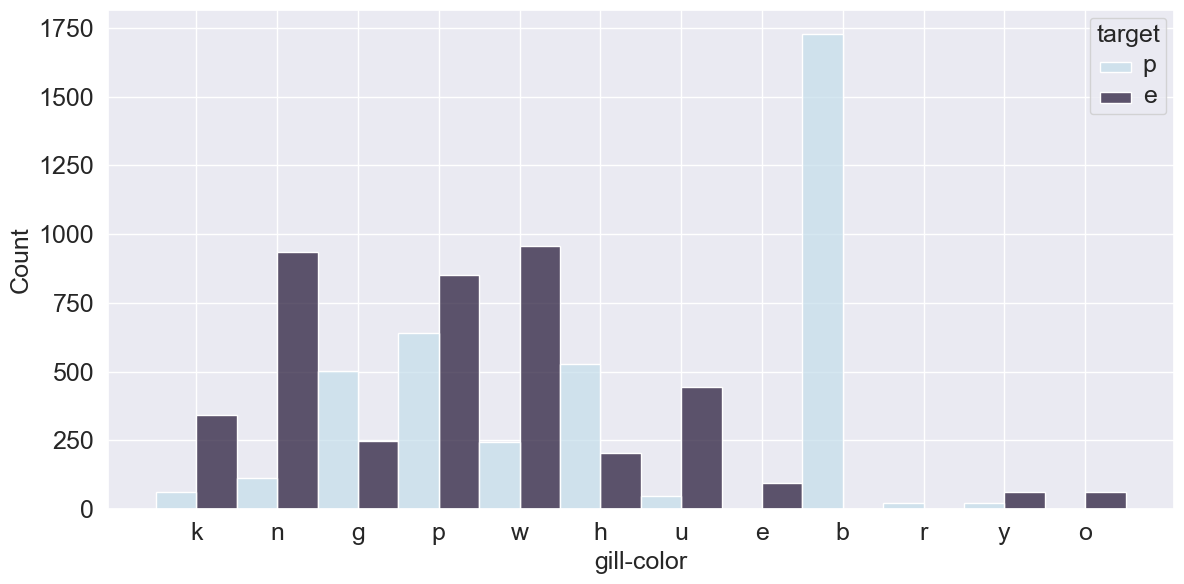

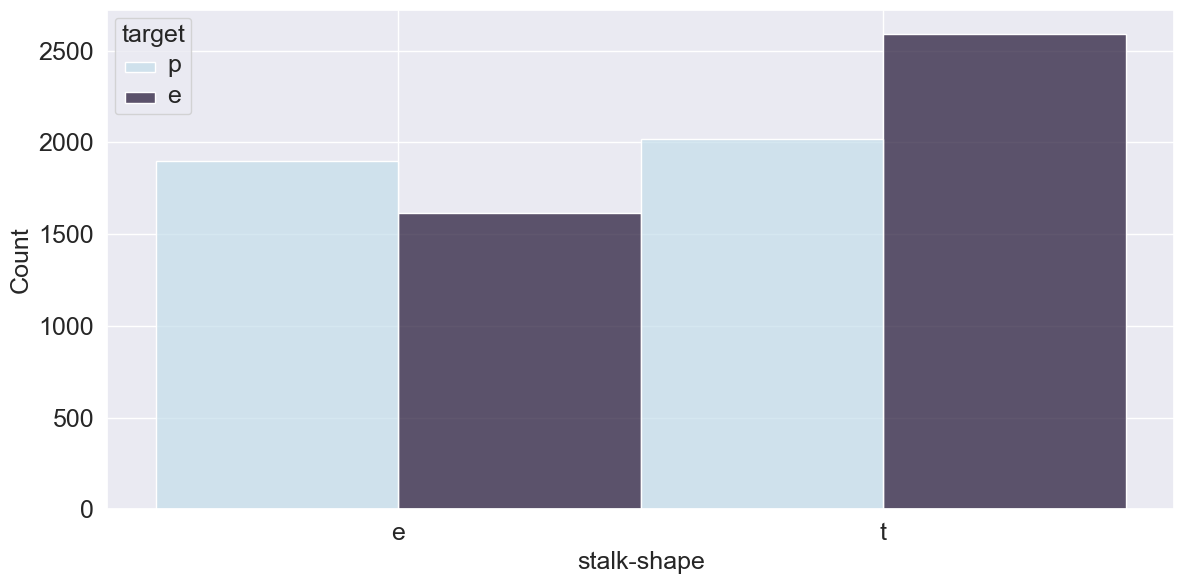

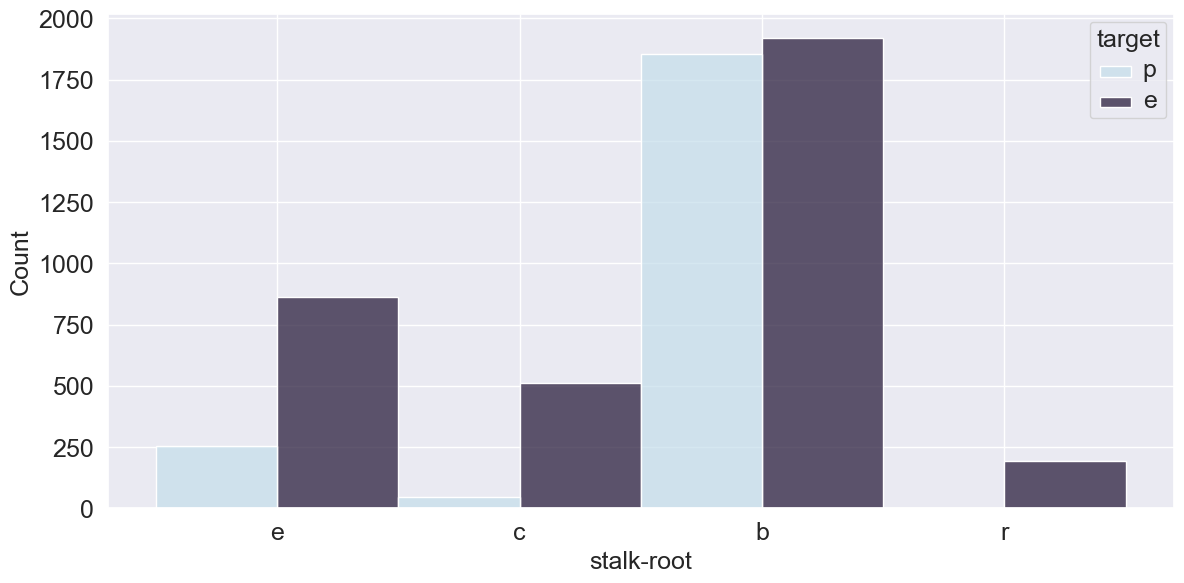

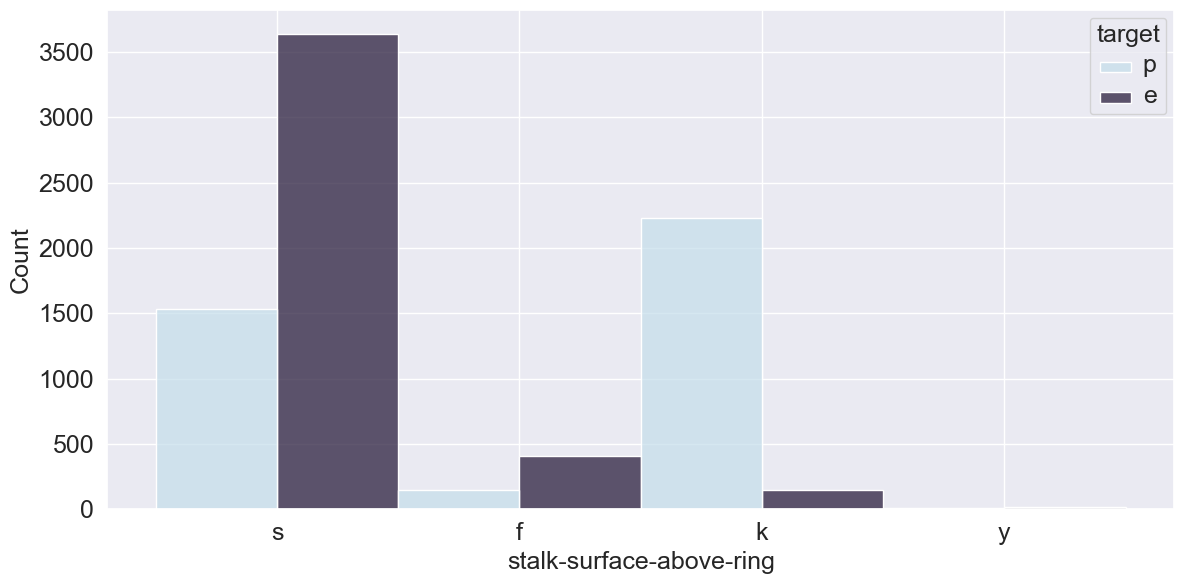

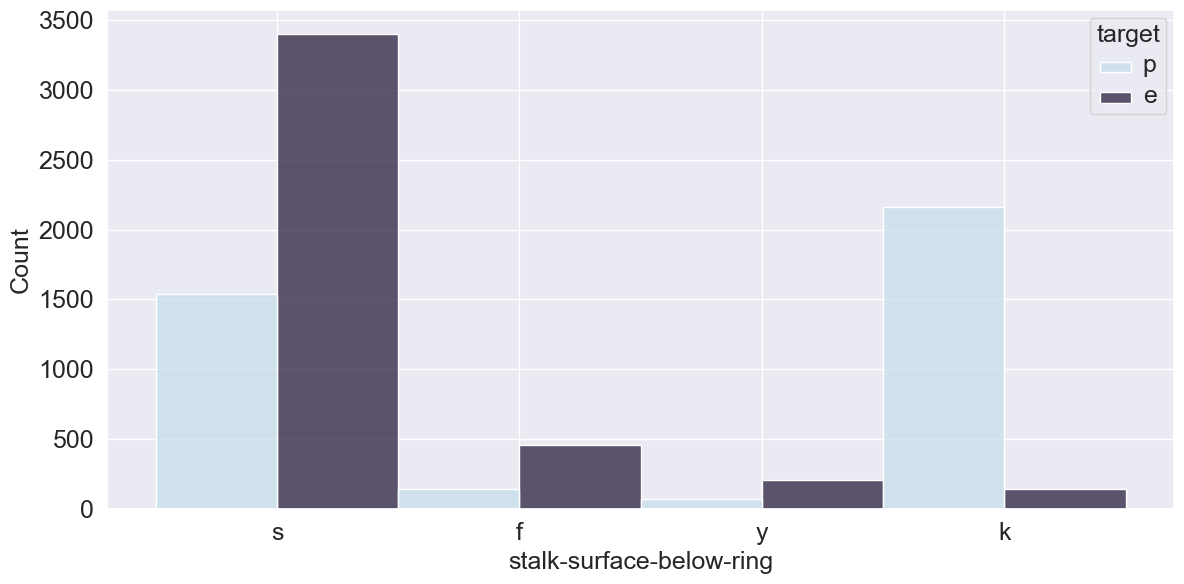

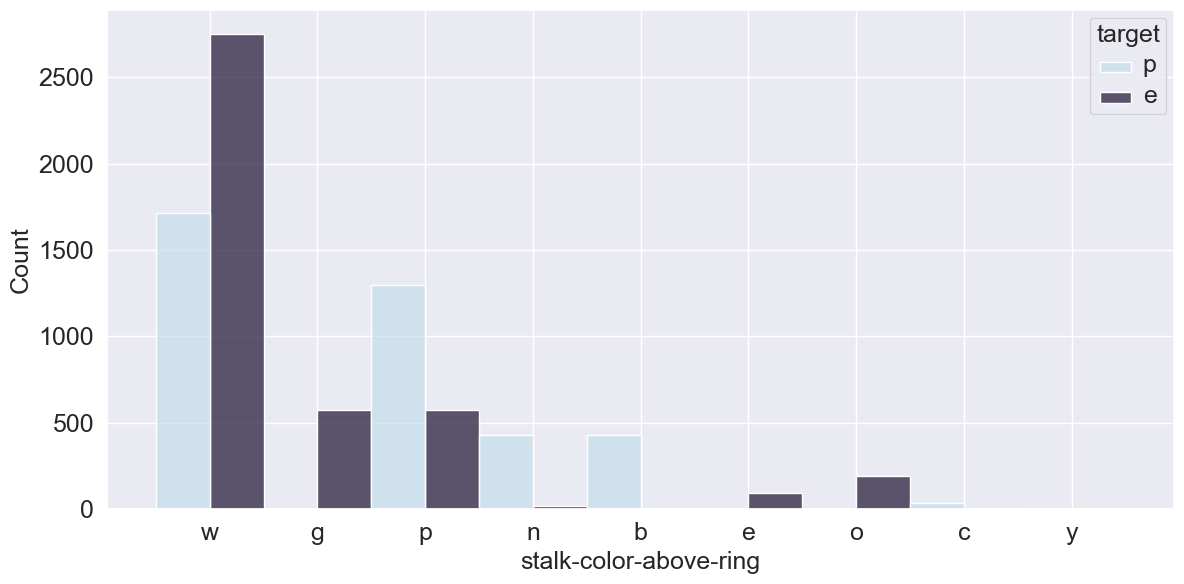

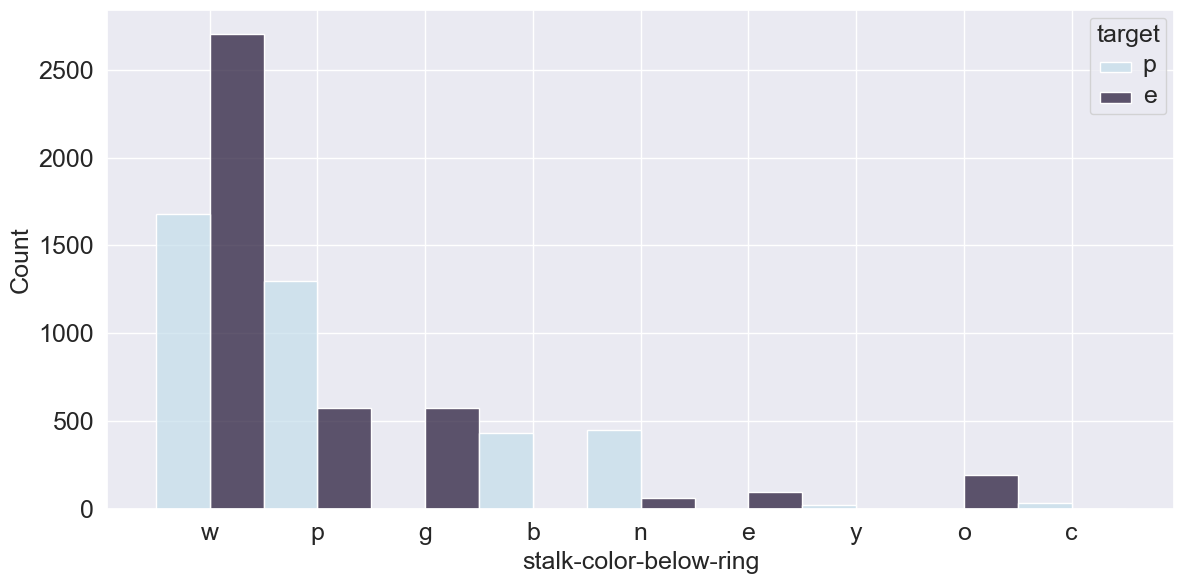

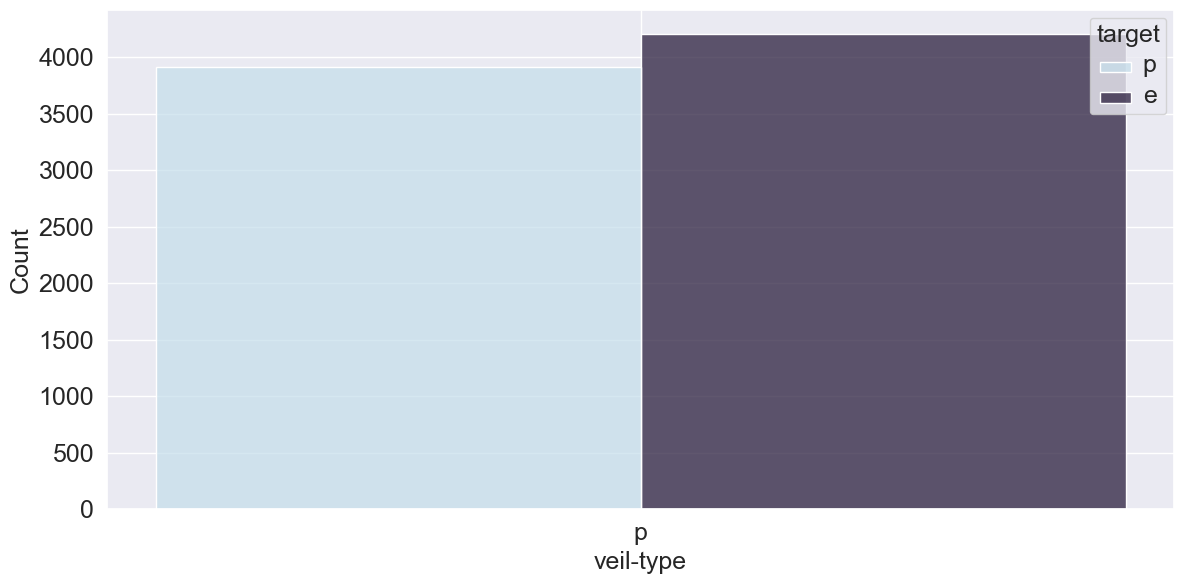

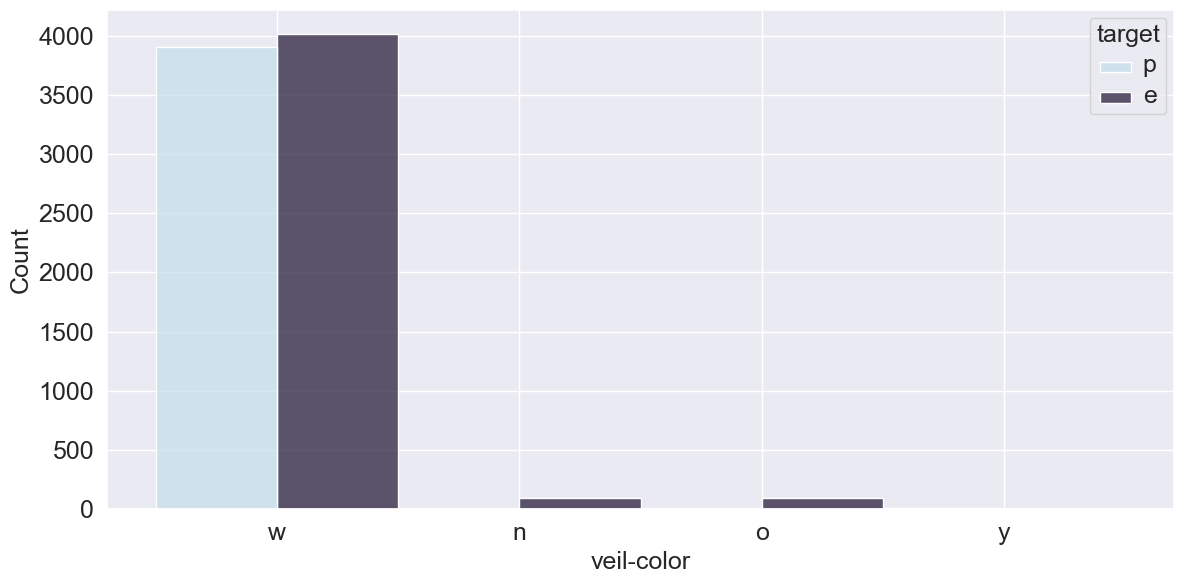

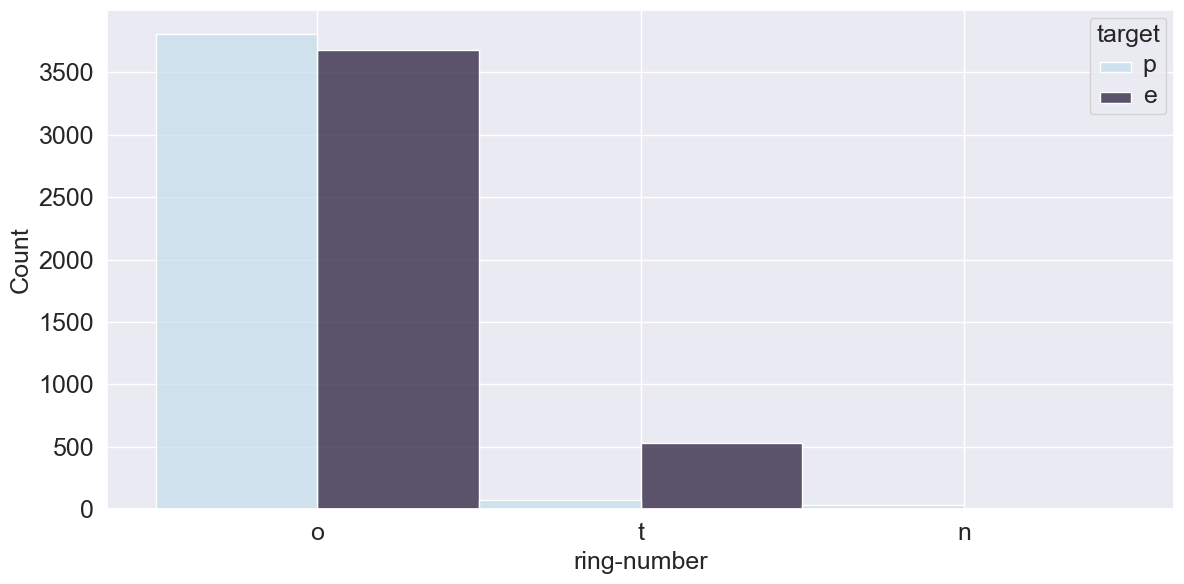

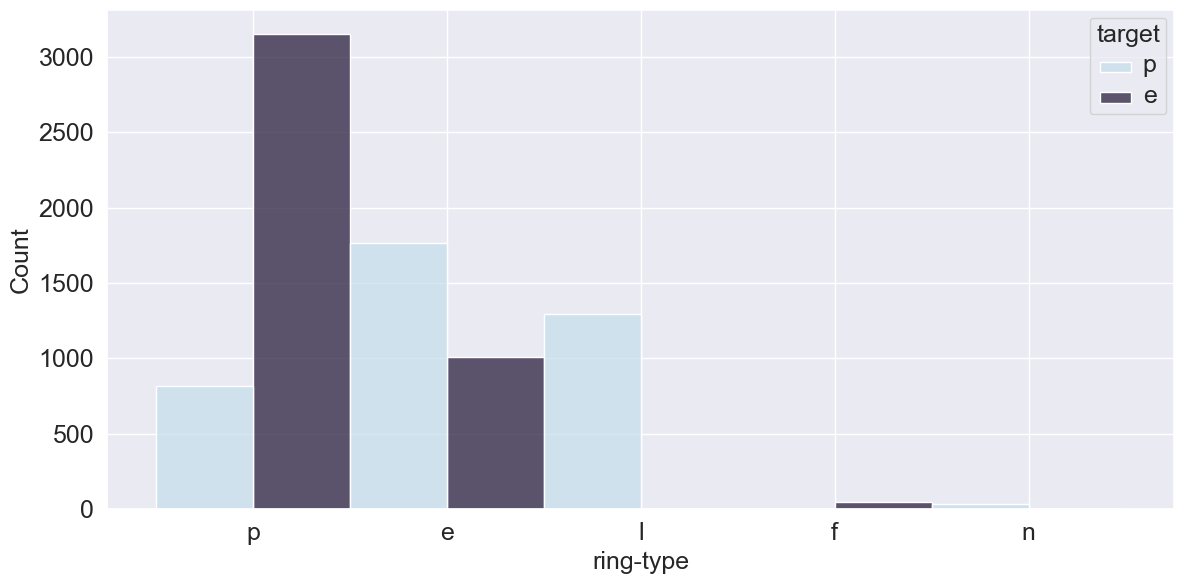

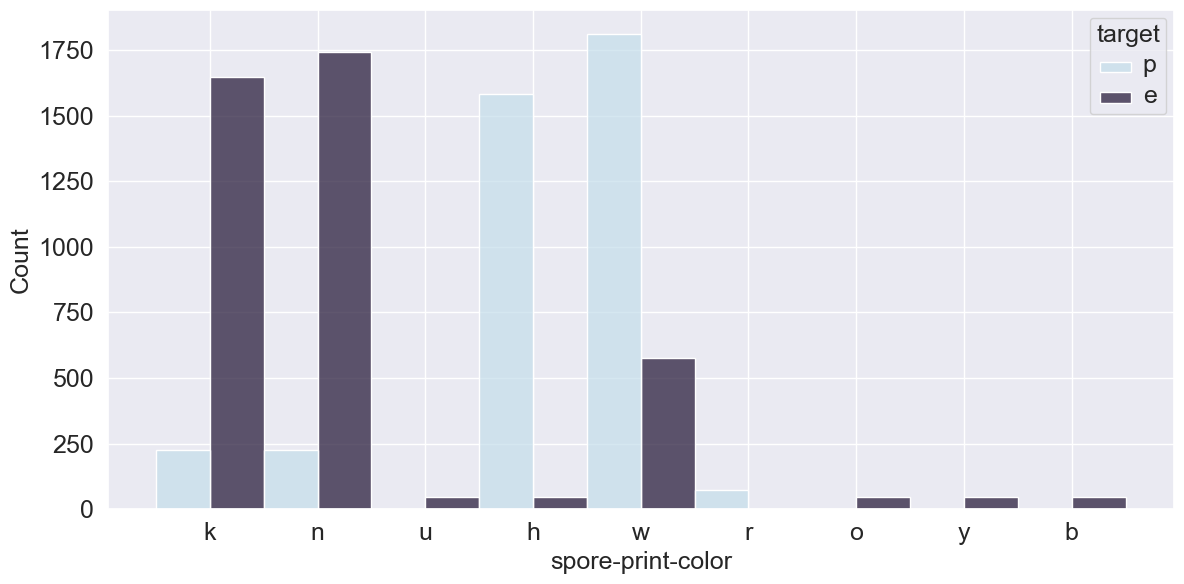

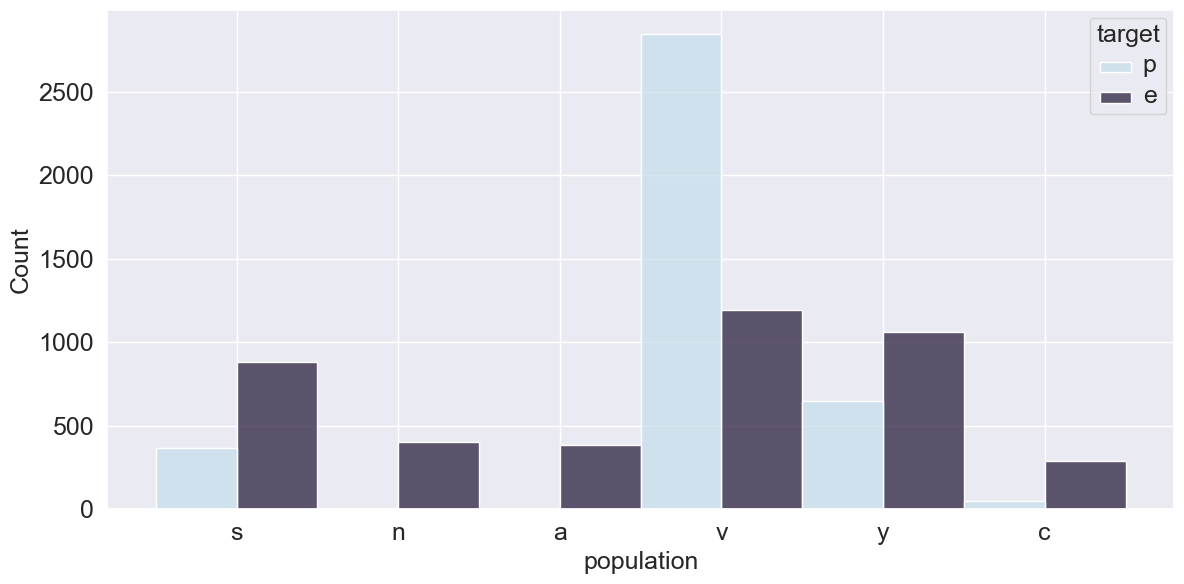

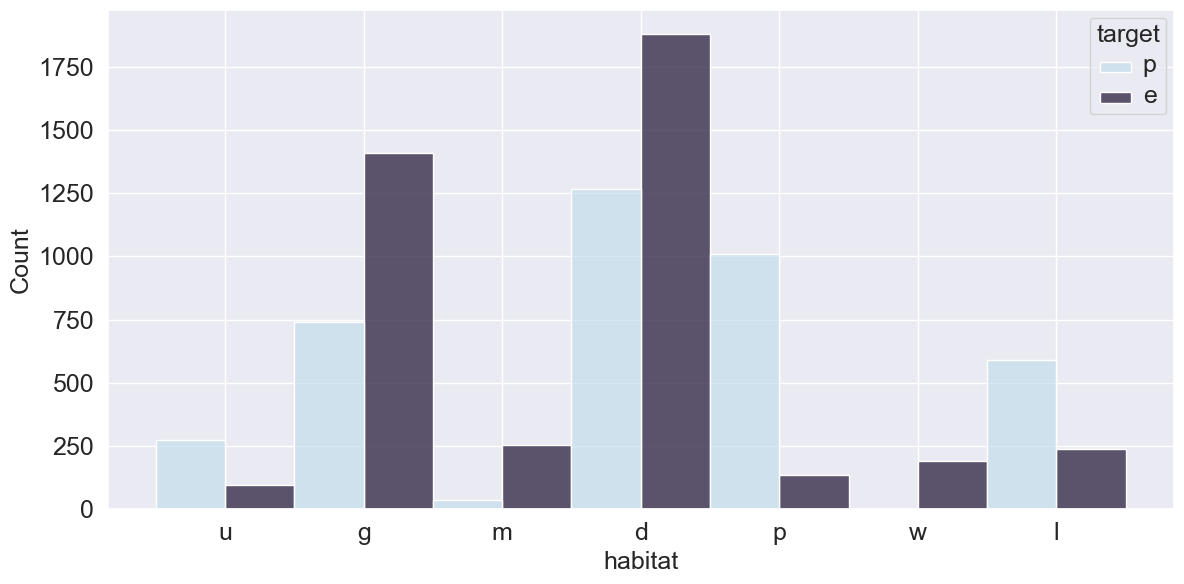

In [9]:
#sns.set_theme(style="whitegrid")

for i in df.columns:
    if i != "target":  
        plt.figure(figsize=(12, 6))
        ax = sns.histplot(data=df, x=i, hue="target", multiple="dodge", palette='ch:s=.25,rot=-.25')
        plt.xlabel(i, fontsize=18)
        plt.ylabel("Count", fontsize=18)
        #plt.title(f"Distribution of {i} by Target Class", fontsize=16)
        plt.setp(ax.get_legend().get_texts(), fontsize='18') # for legend text
        plt.setp(ax.get_legend().get_title(), fontsize='18') 
        plt.xticks(fontsize=18)
        plt.yticks(fontsize=18)
        plt.tight_layout()
        plt.savefig(f"fig/{i}.png") 
        plt.show()

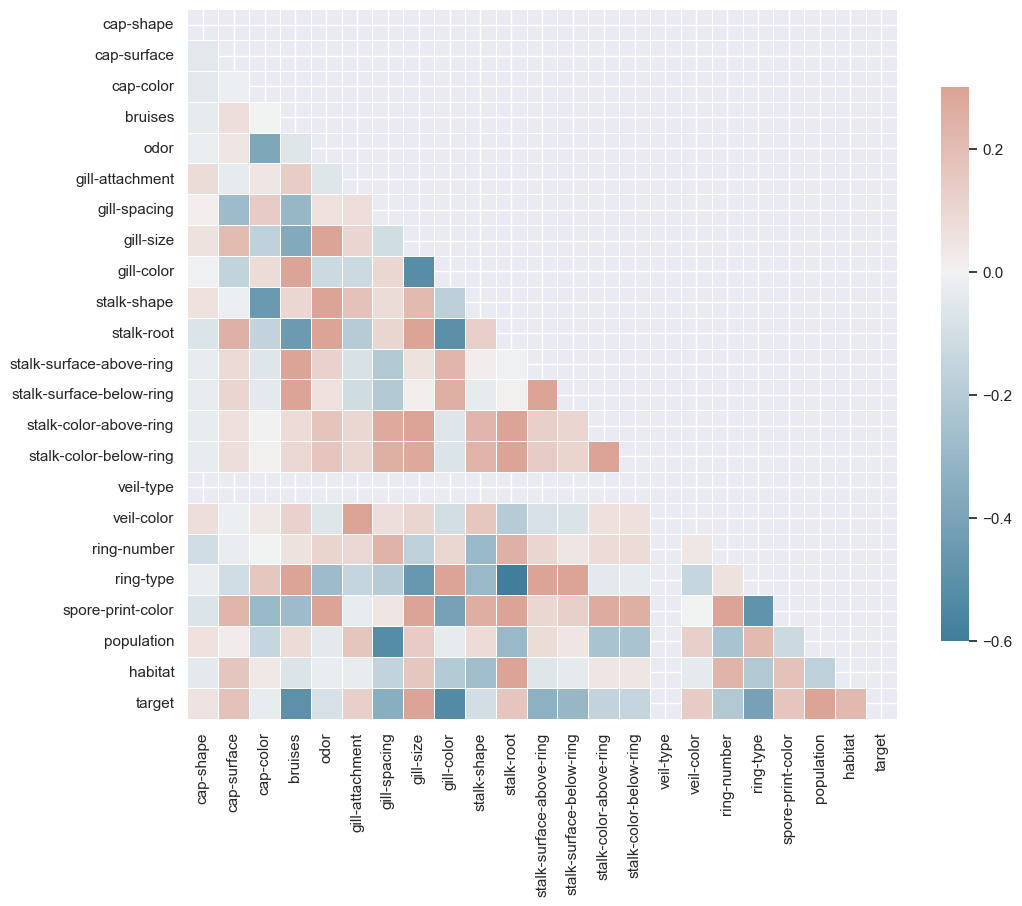

In [13]:
import numpy as np
df = pd.DataFrame(X)
df["target"] = y
df = df.apply(LabelEncoder().fit_transform)
corr = df.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(11, 12))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.tight_layout() 

plt.savefig(f"fig/correlation.png")